# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "../Downloads/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [ ]:
cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
unique_city=[]
lat = []
cloud=[]
country=[]
Date=[]
lng=[]
Wind=[]
max_temp=[]
humidity=[]
record= 0
Set=1
start=time.time()
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Build partial query URL
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&units={units}&q={city}"
        print(f"Processing Record {record} of {Set} | {city}")
        response = requests.get(query_url).json()
        unique_city.append(response["name"])
        country.append(response["sys"]["country"])
        Date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        Wind.append(response["wind"]["speed"])
        cloud.append(response["clouds"]["all"])
        record= record + 1
        if record== 50 :
            end=time.time()
            record=0
            Set=Set + 1
            time.sleep((60)-(end-start))
            start=time.time()
    except:
        print("City not found. Skipping..")
    continue
      
    


Beginning Data Retrieval
-------------------------------
Processing Record 0 of 1 | provideniya
Processing Record 1 of 1 | kirillov
Processing Record 2 of 1 | lompoc
Processing Record 3 of 1 | burica
City not found. Skipping..
Processing Record 3 of 1 | new norfolk
Processing Record 4 of 1 | samusu
City not found. Skipping..
Processing Record 4 of 1 | necochea
Processing Record 5 of 1 | hobart
Processing Record 6 of 1 | belushya guba
City not found. Skipping..
Processing Record 6 of 1 | atuona
Processing Record 7 of 1 | butaritari
Processing Record 8 of 1 | jamestown
Processing Record 9 of 1 | saint-philippe
Processing Record 10 of 1 | vaitupu
City not found. Skipping..
Processing Record 10 of 1 | saquarema
Processing Record 11 of 1 | rocha
Processing Record 12 of 1 | illoqqortoormiut
City not found. Skipping..
Processing Record 12 of 1 | fort wellington
Processing Record 13 of 1 | constitucion
Processing Record 14 of 1 | upernavik
Processing Record 15 of 1 | kavieng
Processing Record 

Processing Record 20 of 4 | jerusalem
Processing Record 21 of 4 | rongcheng
Processing Record 22 of 4 | uralskiy
City not found. Skipping..
Processing Record 22 of 4 | ponta do sol
Processing Record 23 of 4 | arona
Processing Record 24 of 4 | nelson bay
Processing Record 25 of 4 | metehara
City not found. Skipping..
Processing Record 25 of 4 | trincomalee
Processing Record 26 of 4 | kathu
Processing Record 27 of 4 | cockburn harbour
City not found. Skipping..
Processing Record 27 of 4 | mount gambier
Processing Record 28 of 4 | anadyr
Processing Record 29 of 4 | kuantan
Processing Record 30 of 4 | salalah
Processing Record 31 of 4 | bambous virieux
Processing Record 32 of 4 | bulgan
Processing Record 33 of 4 | ijuin
Processing Record 34 of 4 | toliary
City not found. Skipping..
Processing Record 34 of 4 | alofi
Processing Record 35 of 4 | lagoa
Processing Record 36 of 4 | mahadday weyne
City not found. Skipping..
Processing Record 36 of 4 | kousseri
City not found. Skipping..
Processin

Processing Record 6 of 8 | rundu
Processing Record 7 of 8 | pauini
Processing Record 8 of 8 | el jicaro
Processing Record 9 of 8 | goderich
Processing Record 10 of 8 | makubetsu
Processing Record 11 of 8 | puerto escondido
Processing Record 12 of 8 | seydi
Processing Record 13 of 8 | sao desiderio
Processing Record 14 of 8 | itarema
Processing Record 15 of 8 | codrington
Processing Record 16 of 8 | tarrafal
Processing Record 17 of 8 | launceston
Processing Record 18 of 8 | samalaeulu
City not found. Skipping..
Processing Record 18 of 8 | karaul
City not found. Skipping..
Processing Record 18 of 8 | mehtar lam
Processing Record 19 of 8 | ixtapa
Processing Record 20 of 8 | freeport
Processing Record 21 of 8 | isiro
Processing Record 22 of 8 | porto novo
Processing Record 23 of 8 | addi ugri
City not found. Skipping..
Processing Record 23 of 8 | bosobolo
Processing Record 24 of 8 | morehead
Processing Record 25 of 8 | shubarshi
Processing Record 26 of 8 | sawakin
Processing Record 27 of 8

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather={"City":unique_city,
             "Cloudiness":cloud,
             "Country":country,
             "Date":Date,
             "Humidity":humidity,
             "Lat":lat,
             "Lng":lng,
             "Max Temp":max_temp,
             "Wind Speed":Wind}

In [5]:
weather_info = pd.DataFrame(city_weather)
weather_info.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [6]:
weather_info.to_csv('../Downloads/weather_info.csv')
weather_info.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,40,RU,1551911400,67,64.42,-173.23,-7.00,2.00
1,Kirillov,0,RU,1551914876,69,59.86,38.38,-12.76,6.72
2,Lompoc,75,US,1551914784,87,34.64,-120.46,15.56,5.10
3,New Norfolk,40,AU,1551914839,50,-42.78,147.06,14.44,5.70
4,Necochea,36,AR,1551914289,70,-38.55,-58.74,26.11,1.79


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

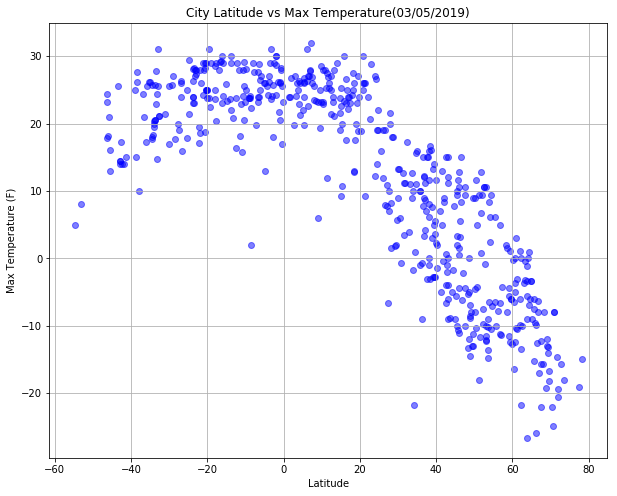

In [7]:
date="(03/05/2019)"
plt.figure(figsize=(10,8))
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature' +  date)
plt.savefig("Lat_Vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

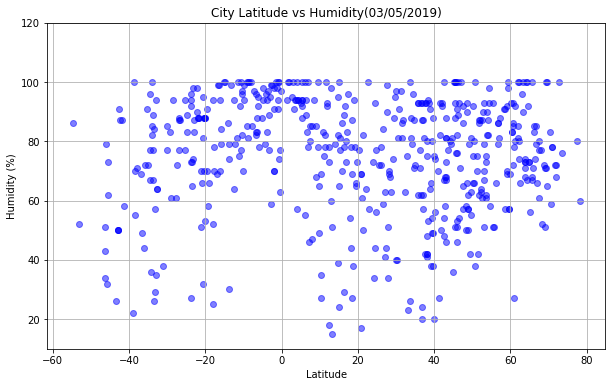

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(weather_info["Lat"], weather_info["Humidity"], color='b', alpha=0.5)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity' + date)
plt.savefig("Lat_Vs_Humidity.png")
plt.show()


#### Latitude vs. Cloudiness Plot

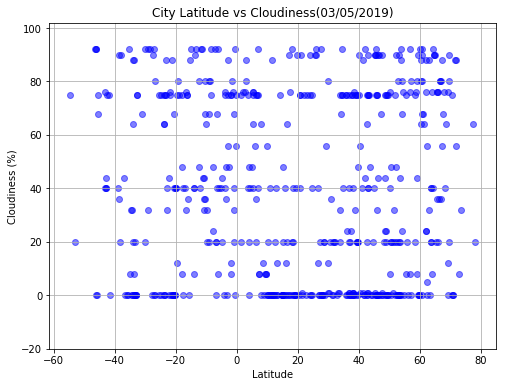

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], color='b', alpha=0.5)
plt.ylim(-20,(weather_info["Cloudiness"].max()+10))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness' + date)
plt.savefig("Lat_Vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

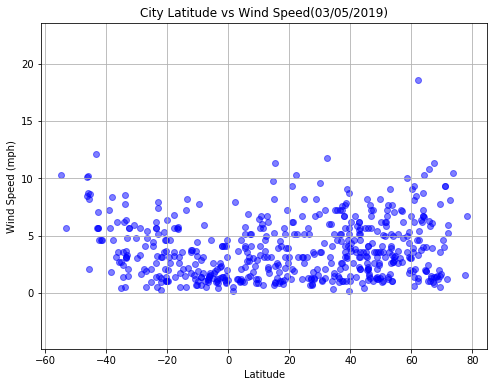

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], color='b', alpha=0.5)
plt.ylim((weather_info["Wind Speed"].min()-5),(weather_info["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.grid()
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed' + date)
plt.savefig("Lat_Vs_Wind.png")
plt.show()